In [7]:
from IPython.display import display
import pandas as pd
import numpy as np
import json

frame = pd.read_csv('data/pe32_vendors.csv.gz', dtype=str)
frame = frame.set_index('link')
# av_classified = frame.count() / len(frame)
# top20 = av_classified.sort_values(ascending=False)[:20]
# display(top20)

## Check AV

Check how vendors follow each other by looking at duplicated samples.

In [8]:
headers = pd.read_csv('data/header_analyses.csv')
headers.link = headers.link.apply(lambda x: x.split('/')[-2])
headers = headers.set_index('link')
headers.date = pd.to_datetime(headers.date, format='%d/%m/%Y')
headers.drop(['antivirus', 'file_type', 'file_name'], axis=1, inplace=True)

In [9]:
frame = frame.join(headers)

In [153]:
# Bad column
frame.drop(frame.columns[0], axis=1, inplace=True)

dups = set(frame[frame.duplicated('md5')].md5.values)
dups = set(['afe07ac688a83295b38469c196e7e566'])
diff = dict()

for md5 in dups:
    display(md5)
    sample = frame[frame.md5 == md5].sort_values('date').iloc[[0, -1]].drop(['md5', 'date'], axis=1).replace('Clean', np.nan)
    display(sample)
    values = sample.count(axis=1).values
    display(values)
    diff[md5] = values[-1] - values[0]
    
display(diff)

'afe07ac688a83295b38469c196e7e566'

,Antivir7,Antiy-AVL,Arcabit,Authentium,Avast,Avast5,Avira,Baidu,Baidu-International,BitDefender,...,Yandex,Zillya,Zoner,a-squared,ahnlab,eSafe,eScan,eTrust-InoculateIT,eTrust-Vet,nProtect
link,,,,,,,,,,,,,,,,,,,,,
NzBkNWIyMWIzMWE1NDk1ZjlhZDRmNWZkNGZmMDVmNTc,NaN,NaN,NaN,NaN,Win32:Malware-gen,NaN,TR/Crypt.ZPACK.167116,NaN,Adware.Win32.iBryte.DIRT,Trojan.GenericKD.2422607,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NzU4Y2MzZDMxODMzNGYzMWJjNWZjOTUxZTk3MTdmZmE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array([28,  4])

{'afe07ac688a83295b38469c196e7e566': -24}

In [53]:
with open('dups.json', 'r') as file:
    content = file.read()
# import json
# with open('dups.json', 'w') as file:
#     for md5, n in diff.items():
#         file.write('{},{}\n'.format(md5, n))
content = np.array(content.split('\n'))
content = [c.split(',') for c in content]
content = content[:-1]

In [55]:
values = []
for i in content:
    values.append(i[1])

In [60]:
import matplotlib.pyplot as plt
series = pd.Series(values, dtype=int)

count    29334.000000
mean         3.565692
std          7.965992
min        -43.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         41.000000
dtype: float64

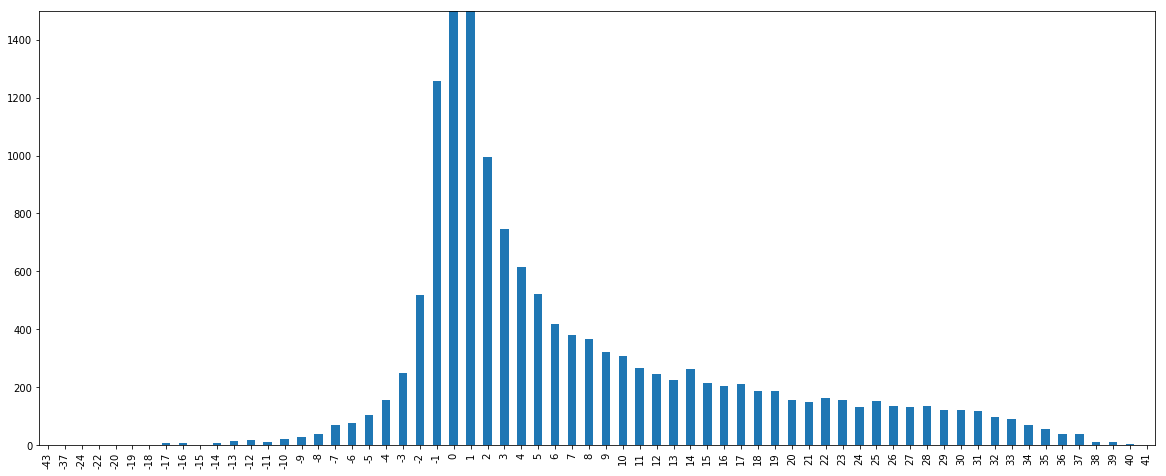

In [95]:
display(series.describe())
# display(series.value_counts().sort_index())
series.value_counts().sort_index().plot.bar(figsize=((20, 8)), ylim=(0, 1500))
plt.show()

In [100]:
display(list(filter(lambda x: int(x[1]) < -20, content)))

[['5ce7be4850f1130e2552e782d58a706f', '-24'],
 ['ae8b07351b55b33dc352e33b64875ada', '-37'],
 ['afe07ac688a83295b38469c196e7e566', '-22'],
 ['3b34deae43f1da0706c0aedf0b0402cd', '-43']]

In [184]:
for r in frame[frame.index == 'NzBkNWIyMWIzMWE1NDk1ZjlhZDRmNWZkNGZmMDVmNTc'].replace('Clean', np.nan).drop(['md5', 'date'], axis=1).iterrows():
    print(r[1].value_counts().sum())
    
test = frame[frame.index == 'NzBkNWIyMWIzMWE1NDk1ZjlhZDRmNWZkNGZmMDVmNTc'].drop(['md5', 'date'], axis=1).replace('Clean', np.nan)
test.groupby(test.index).count().sum().sum()

display(test.dropna(axis=1))
for i in test.dropna(axis=1).columns:
    print(i)
    
display(frame.columns)

28


,Avast,Avira,Baidu-International,BitDefender,Cyren,DrWeb,ESET-NOD32,Emsisoft,F-Prot,F-Secure,...,McAfee-GW-Edition,MicroWorld-eScan,Microsoft,Panda,Qihoo-360,Rising,Sophos,Tencent,TrendMicro,TrendMicro-HouseCall
link,,,,,,,,,,,,,,,,,,,,,
NzBkNWIyMWIzMWE1NDk1ZjlhZDRmNWZkNGZmMDVmNTc,Win32:Malware-gen,TR/Crypt.ZPACK.167116,Adware.Win32.iBryte.DIRT,Trojan.GenericKD.2422607,W32/Backdoor.NIJP-1779,BackDoor.Siggen.58526,Win32/Agent.QKJ,Trojan-Downloader.Win32.Agent (A),W32/Backdoor2.HYEJ,Trojan.Injector.BKI,...,BehavesLike.Win32.Ransom.km,Trojan.Injector.BKI,TrojanDownloader:Win32/Recslurp.B,Trj/Chgt.O,HEUR/QVM20.1.Malware.Gen,PE:Malware.XPACK-LNR/Heur!1.5594,Troj/Kryptik-FH,Trojan.Win32.Qudamah.Gen.0,TROJ_RECSLURP.YWF,TROJ_RECSLURP.YWF


Avast
Avira
Baidu-International
BitDefender
Cyren
DrWeb
ESET-NOD32
Emsisoft
F-Prot
F-Secure
Fortinet
GData
Ikarus
K7AntiVirus
K7GW
Kaspersky
Malwarebytes
McAfee
McAfee-GW-Edition
MicroWorld-eScan
Microsoft
Panda
Qihoo-360
Rising
Sophos
Tencent
TrendMicro
TrendMicro-HouseCall


Index(['Antivir7', 'Antiy-AVL', 'Arcabit', 'Authentium', 'Avast', 'Avast5',
       'Avira', 'Baidu', 'Baidu-International', 'BitDefender', 'Bkav',
       'ByteHero', 'CAT-QuickHeal', 'CMC', 'ClamAV', 'Command', 'Commtouch',
       'Comodo', 'CrowdStrike', 'Cyren', 'DrWeb', 'DrWebSE', 'ESET-NOD32',
       'Emsisoft', 'Ewido', 'F-Prot', 'F-Prot4', 'F-Secure', 'FileAdvisor',
       'Fortinet', 'FortinetBeta', 'GData', 'Ikarus', 'Invincea', 'Jiangmin',
       'K7AntiVirus', 'K7GW', 'Kaspersky', 'Kingsoft', 'Malwarebytes',
       'McAfee', 'McAfee+Artemis', 'McAfee-GW-Edition', 'McAfeeBeta',
       'MicroWorld-eScan', 'Microsoft', 'NANO-Antivirus', 'NOD32', 'NOD32Beta',
       'NOD32v2', 'Norman', 'PCTools', 'Panda', 'PandaB3', 'PandaBeta',
       'Prevx', 'Prevx1', 'Qihoo-360', 'Rising', 'SAVMail', 'SUPERAntiSpyware',
       'SecureWeb-Gateway', 'Sophos', 'Sunbelt', 'Symantec', 'T3', 'Tencent',
       'TheHacker', 'TotalDefense', 'TrendMicro', 'TrendMicro-HouseCall',
       'UNA', 'VBA32',